In [1]:
import soditools.soditools as u
import pandas as pd
import numpy as np

In [2]:
country_id = 'AR'

plp_file = f'UPSELL_{country_id}.csv'
plp_bucket = f'bucket_recommender_{country_id.lower()}'
plp_path = f'gs://{plp_bucket}/'

sandbox_file = f'UPSELL_{country_id}.csv'
sandbox_bucket = f'bucket_recommender_sandbox_{country_id.lower()}'
sandbox_path = f'gs://{sandbox_bucket}/'

In [3]:
df_plp = pd.read_csv(plp_path+plp_file)

In [4]:
df_plp.head()

,productId,upsell_a_pro,upsell_a_hogar,upsell_a_sin_segmento,upsell_b_pro,upsell_b_hogar,upsell_b_sin_segmento
0,1102583,1261177|1261185|2522217|1261371|1261363|113783...,1261177|1261185|2522217|1261371|1261363|113783...,1261177|1261185|2522217|1261371|1261363|113783...,1261177|1261185|2522217|1261371|1261363|113783...,1261177|1261185|2522217|1261371|1261363|113783...,1261177|1261185|2522217|1261371|1261363|113783...
1,1668757,9030417|9030409|9030433|9030425|8721831|248032...,9030417|9030409|9030433|9030425|8721831|248032...,9030417|9030409|9030433|9030425|8721831|248032...,9030417|9030409|9030433|9030425|8721831|248032...,9030417|9030409|9030433|9030425|8721831|248032...,9030417|9030409|9030433|9030425|8721831|248032...
2,2414511,883685X|2543737|9032134|9032088|8718660|903205...,883685X|2543737|9032134|9032088|8718660|903205...,883685X|2543737|9032134|9032088|8718660|903205...,883685X|2543737|9032134|9032088|8718660|903205...,883685X|2543737|9032134|9032088|8718660|903205...,883685X|2543737|9032134|9032088|8718660|903205...
3,8975205,8975159|8975191|8975175|8975132|8975094|897518...,8975159|8975191|8975175|8975132|8975094|897518...,8975159|8975191|8975175|8975132|8975094|897518...,8975116|1926322|8975159|3230961|3230929|323090...,2206447|3230902|8975116|323097X|3230929|323100...,2206447|8975116|3230902|8975159|3230961|323097...
4,2458349,2458985|1954407|2077698|2195275|2077515|207775...,2458985|1954407|2077698|2195275|2077515|207775...,2458985|1954407|2077698|2195275|2077515|207775...,2458985|1954407|2077698|2195275|2077515|207775...,2458985|1954407|2077698|2195275|2077515|207775...,2458985|1954407|2077698|2195275|2077515|207775...


In [5]:
df_sandbox = pd.read_csv(sandbox_path+sandbox_file)

In [6]:
df_sandbox.head()

,productId,upsell_a_pro,upsell_a_hogar,upsell_a_sin_segmento,upsell_b_pro,upsell_b_hogar,upsell_b_sin_segmento
0,2457717,115575X|1155946|1155709|2457520|1533193|329834...,115575X|1155946|1155709|2457520|1533193|329834...,115575X|1155946|1155709|2457520|1533193|329834...,2457601|245761X|1812343|2457695|1812289|245765...,1812297|1812270|2457601|245761X|1812343|181236...,2457601|1812327|1812343|245761X|2457709|181229...
1,1091018,1150553|229558X|1150561|3269310|3269299|872186...,1150553|229558X|1150561|3269310|3269299|872186...,1150553|229558X|1150561|3269310|3269299|872186...,1150553|229558X|1150561|3269310|3269299|872186...,1150553|229558X|1150561|3269310|3269299|872186...,1150553|229558X|1150561|3269310|3269299|872186...
2,2543672,8718733|8718725|9032185|9032193|8718717|903215...,8718733|8718725|9032185|9032193|8718717|903215...,8718733|8718725|9032185|9032193|8718717|903215...,2543664|8836957|883671X|8836965|8718695|883669...,2543664|8836957|883671X|8718695|8836892|903220...,2543664|8836957|883671X|8718695|8836892|903220...
3,2502445,229558X|3269310|1150553|1150561|3269299|903041...,229558X|3269310|1150553|1150561|3269299|903041...,229558X|3269310|1150553|1150561|3269299|903041...,229558X|3269310|1150553|1150561|3269299|903041...,229558X|3269310|1150553|1150561|3269299|903041...,229558X|3269310|1150553|1150561|3269299|903041...
4,3193934,9030425|9030417|9030409|9030433|1150448|872184...,9030425|9030417|9030409|9030433|1150448|872184...,9030425|9030417|9030409|9030433|1150448|872184...,3280225|2174189|3280241|3280233|3316335|331640...,3280225|2174189|3280241|3193942|3280233|319392...,3280225|2174189|3193942|3280241|3280233|903248...


In [7]:
df_plp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53854 entries, 0 to 53853
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   productId              53854 non-null  object
 1   upsell_a_pro           51022 non-null  object
 2   upsell_a_hogar         51022 non-null  object
 3   upsell_a_sin_segmento  51022 non-null  object
 4   upsell_b_pro           53854 non-null  object
 5   upsell_b_hogar         53854 non-null  object
 6   upsell_b_sin_segmento  53854 non-null  object
dtypes: object(7)
memory usage: 2.9+ MB


In [8]:
df_sandbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53851 entries, 0 to 53850
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   productId              53851 non-null  object
 1   upsell_a_pro           51019 non-null  object
 2   upsell_a_hogar         51019 non-null  object
 3   upsell_a_sin_segmento  51019 non-null  object
 4   upsell_b_pro           53851 non-null  object
 5   upsell_b_hogar         53851 non-null  object
 6   upsell_b_sin_segmento  53851 non-null  object
dtypes: object(7)
memory usage: 2.9+ MB


In [9]:
_cols = ['productId','upsell_b_sin_segmento','upsell_b_pro','upsell_b_hogar']
df = pd.merge(left=df_plp[_cols], right=df_sandbox[_cols], how='outer', on='productId', suffixes=['_plp','_sandbox'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53856 entries, 0 to 53855
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   productId                      53856 non-null  object
 1   upsell_b_sin_segmento_plp      53854 non-null  object
 2   upsell_b_pro_plp               53854 non-null  object
 3   upsell_b_hogar_plp             53854 non-null  object
 4   upsell_b_sin_segmento_sandbox  53851 non-null  object
 5   upsell_b_pro_sandbox           53851 non-null  object
 6   upsell_b_hogar_sandbox         53851 non-null  object
dtypes: object(7)
memory usage: 2.9+ MB


In [11]:
df.head()

,productId,upsell_b_sin_segmento_plp,upsell_b_pro_plp,upsell_b_hogar_plp,upsell_b_sin_segmento_sandbox,upsell_b_pro_sandbox,upsell_b_hogar_sandbox
0,1102583,1261177|1261185|2522217|1261371|1261363|113783...,1261177|1261185|2522217|1261371|1261363|113783...,1261177|1261185|2522217|1261371|1261363|113783...,1261185|2522217|1261290|1261371|1261363|126128...,1261185|2522217|1261290|1261371|1261363|126128...,1261185|2522217|1261290|1261371|1261363|126128...
1,1668757,9030417|9030409|9030433|9030425|8721831|248032...,9030417|9030409|9030433|9030425|8721831|248032...,9030417|9030409|9030433|9030425|8721831|248032...,9030433|9030409|9030417|9030425|8721866|115055...,9030433|9030409|9030417|9030425|8721866|115055...,9030433|9030409|9030417|9030425|8721866|115055...
2,2414511,883685X|2543737|9032134|9032088|8718660|903205...,883685X|2543737|9032134|9032088|8718660|903205...,883685X|2543737|9032134|9032088|8718660|903205...,2543737|8718660|883685X|9032061|9032053|903213...,2543737|8718660|883685X|9032061|9032053|903213...,2543737|8718660|883685X|9032061|9032053|903213...
3,8975205,2206447|8975116|3230902|8975159|3230961|323097...,8975116|1926322|8975159|3230961|3230929|323090...,2206447|3230902|8975116|323097X|3230929|323100...,2206447|8975116|3230902|8975159|3230961|323097...,8975116|1926322|8975159|3230961|3230929|323090...,2206447|3230902|8975116|323097X|3230929|323100...
4,2458349,2458985|1954407|2077698|2195275|2077515|207775...,2458985|1954407|2077698|2195275|2077515|207775...,2458985|1954407|2077698|2195275|2077515|207775...,2300559|2458519|2078392|2300311|2458292|207761...,2300559|2458519|2078392|2300311|2458292|207761...,2300559|2458519|2078392|2300311|2458292|207761...


In [12]:
df.describe()

,productId,upsell_b_sin_segmento_plp,upsell_b_pro_plp,upsell_b_hogar_plp,upsell_b_sin_segmento_sandbox,upsell_b_pro_sandbox,upsell_b_hogar_sandbox
count,53856,53854,53854,53854,53851,53851,53851
unique,53856,53180,53180,53180,52960,52959,52960
top,1102583,8989958|8989982|8989974|8989966|2305232|898993...,8989958|8989982|8989974|8989966|2305232|898993...,8989958|8989982|8989974|8989966|2305232|898993...,2244896|2244918|2293056|2244942|2293064|224493...,2244896|2244918|2293056|2244942|2293064|224493...,2244896|2244918|2293056|2244942|2293064|224493...
freq,1,13,13,13,38,38,38


In [13]:
from typing import Tuple

def compare_lists(str_list1: str, str_list2: str, separator: str = "|") -> Tuple[float, float, float]:
    """
    Compara dos listas representadas como strings usando múltiples métricas:
    - Jaccard Similarity
    - Sorensen-Dice Coefficient
    - Overlap Coefficient
    
    :param str_list1: Primer string de elementos separados por el delimitador.
    :param str_list2: Segundo string de elementos separados por el delimitador.
    :param separator: Caracter que separa los elementos en los strings (por defecto "|").
    :return: (Jaccard, Dice, Overlap)
    """
    if not isinstance(str_list1, str):
        str_list1 = str(str_list1) if str_list1 is not None else ""

    if not isinstance(str_list2, str):
        str_list2 = str(str_list2) if str_list2 is not None else ""

    if not str_list1 or not str_list2:
        return (0.0, 0.0, 0.0)

    set1 = set(str_list1.split(separator))
    set2 = set(str_list2.split(separator))

    intersection = len(set1 & set2)
    union = len(set1 | set2)
    min_size = min(len(set1), len(set2))

    jaccard = intersection / union if union != 0 else 0.0
    dice = (2 * intersection) / (len(set1) + len(set2)) if (len(set1) + len(set2)) != 0 else 0.0
    overlap = intersection / min_size if min_size != 0 else 0.0

    return (jaccard, dice, overlap)

In [14]:
df.columns

Index(['productId', 'upsell_b_sin_segmento_plp', 'upsell_b_pro_plp',
       'upsell_b_hogar_plp', 'upsell_b_sin_segmento_sandbox',
       'upsell_b_pro_sandbox', 'upsell_b_hogar_sandbox'],
      dtype='object')

In [15]:
df['sim_b_sin_segmento'] = df[['upsell_b_sin_segmento_plp','upsell_b_sin_segmento_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)
df['sim_b_pro'] = df[['upsell_b_pro_plp','upsell_b_pro_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)
df['sim_b_hogar'] = df[['upsell_b_hogar_plp','upsell_b_hogar_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)

In [16]:
df.head(10)

,productId,upsell_b_sin_segmento_plp,upsell_b_pro_plp,upsell_b_hogar_plp,upsell_b_sin_segmento_sandbox,upsell_b_pro_sandbox,upsell_b_hogar_sandbox,sim_b_sin_segmento,sim_b_pro,sim_b_hogar
0,1102583,1261177|1261185|2522217|1261371|1261363|113783...,1261177|1261185|2522217|1261371|1261363|113783...,1261177|1261185|2522217|1261371|1261363|113783...,1261185|2522217|1261290|1261371|1261363|126128...,1261185|2522217|1261290|1261371|1261363|126128...,1261185|2522217|1261290|1261371|1261363|126128...,0.914286,0.914286,0.914286
1,1668757,9030417|9030409|9030433|9030425|8721831|248032...,9030417|9030409|9030433|9030425|8721831|248032...,9030417|9030409|9030433|9030425|8721831|248032...,9030433|9030409|9030417|9030425|8721866|115055...,9030433|9030409|9030417|9030425|8721866|115055...,9030433|9030409|9030417|9030425|8721866|115055...,0.950000,0.950000,0.950000
2,2414511,883685X|2543737|9032134|9032088|8718660|903205...,883685X|2543737|9032134|9032088|8718660|903205...,883685X|2543737|9032134|9032088|8718660|903205...,2543737|8718660|883685X|9032061|9032053|903213...,2543737|8718660|883685X|9032061|9032053|903213...,2543737|8718660|883685X|9032061|9032053|903213...,0.950000,0.950000,0.950000
3,8975205,2206447|8975116|3230902|8975159|3230961|323097...,8975116|1926322|8975159|3230961|3230929|323090...,2206447|3230902|8975116|323097X|3230929|323100...,2206447|8975116|3230902|8975159|3230961|323097...,8975116|1926322|8975159|3230961|3230929|323090...,2206447|3230902|8975116|323097X|3230929|323100...,1.000000,1.000000,1.000000
4,2458349,2458985|1954407|2077698|2195275|2077515|207775...,2458985|1954407|2077698|2195275|2077515|207775...,2458985|1954407|2077698|2195275|2077515|207775...,2300559|2458519|2078392|2300311|2458292|207761...,2300559|2458519|2078392|2300311|2458292|207761...,2300559|2458519|2078392|2300311|2458292|207761...,0.100000,0.100000,0.100000
5,273768X,336500X|3373851|3288951|2308835|3242897|321715...,336500X|3373851|3288951|2308835|3242897|321715...,336500X|3373851|3288951|2308835|3242897|321715...,336500X|3373851|3288951|3242897|2308835|324288...,336500X|3373851|3288951|3242897|2308835|324288...,336500X|3373851|3288951|3242897|2308835|324288...,0.950000,0.950000,0.950000
6,2121808,8829667|8829969|8829772|8829799|8829616|882959...,8829667|8829969|8829772|8829799|8829616|882959...,8829667|8829969|8829772|8829799|8829616|882959...,8829101|8829098|8829950|8829772|8829799|882959...,8829101|8829098|8829950|8829772|8829799|882959...,8829101|8829098|8829950|8829772|8829799|882959...,0.900000,0.900000,0.900000
7,2355302,3285871|3285855|3345459|3345467|8829101|328587...,3285871|3285855|3345459|3345467|8829101|328587...,3285871|3285855|3345459|3345467|8829101|328587...,3285871|3285855|3285898|3345467|3345459|328587...,3285871|3285855|3285898|3345467|3345459|328587...,3285871|3285855|3285898|3345467|3345459|328587...,0.742857,0.742857,0.742857
8,3316114,2645769|3316106|2645793|2645807|9011412|892263...,2645793|3316106|2645807|2645769|9011412|892263...,2645769|3316106|2645793|2645807|9011412|892263...,2645769|3316106|2645793|2645807|9011412|892263...,2645793|3316106|2645807|2645769|9011412|892263...,2645769|3316106|2645793|2645807|9011412|892263...,0.962963,0.962963,0.962963
9,1712497,1548204|170379X|254380X|2543796|1556533|154815...,1548204|170379X|254380X|2543796|1556533|154815...,1548204|170379X|254380X|2543796|1556533|154815...,1548204|170379X|2543796|1771779|1556533|254380...,1548204|170379X|2543796|1771779|1556533|254380...,1548204|170379X|2543796|1771779|1556533|254380...,0.800000,0.800000,0.800000


In [17]:
df[['sim_b_sin_segmento','sim_b_pro','sim_b_hogar']].describe()

,sim_b_sin_segmento,sim_b_pro,sim_b_hogar
count,53856.000000,53856.000000,53856.000000
mean,0.826090,0.825912,0.826055
std,0.200505,0.200444,0.200490
min,0.000000,0.000000,0.000000
25%,0.717949,0.717949,0.717949
50%,0.900000,0.900000,0.900000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


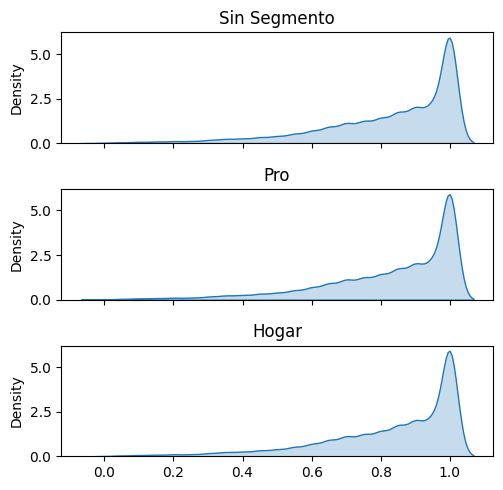

In [18]:
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(3,1,figsize=(5,5), sharex=True)
ax = ax.flat

sns.kdeplot(df['sim_b_sin_segmento'], fill=True, ax=ax[0])
ax[0].set_title('Sin Segmento')
ax[0].set_xlabel(None)
sns.kdeplot(df['sim_b_pro'], fill=True, ax=ax[1])
ax[1].set_title('Pro')
ax[1].set_xlabel(None)
sns.kdeplot(df['sim_b_hogar'], fill=True, ax=ax[2])
ax[2].set_title('Hogar')
ax[2].set_xlabel(None)


plt.tight_layout()

In [19]:
_threshold = .8
np.divide(df[df['sim_b_sin_segmento'] >= _threshold].shape[0], df.shape[0])

0.6775846702317291

In [20]:
import numpy as np
import gcsfs
import io

def load_npz_from_gcs(bucket_path):
    """Carga un archivo .npz desde un bucket de GCS sin cerrarlo antes de tiempo."""
    fs = gcsfs.GCSFileSystem()
    with fs.open(bucket_path, 'rb') as f:
        file_content = f.read()  # Leer el contenido del archivo en memoria
        npz_file = np.load(io.BytesIO(file_content), allow_pickle=True)  # Cargar desde bytes en memoria
        return {key: npz_file[key] for key in npz_file.files}  # Guardar arrays antes de que se cierre

def compare_npz_gcs(file1, file2):
    """Compara dos archivos .npz desde GCS y muestra sus diferencias."""
    data1 = load_npz_from_gcs(file1)
    data2 = load_npz_from_gcs(file2)

    keys1, keys2 = set(data1.keys()), set(data2.keys())

    common_keys = keys1 & keys2
    only_in_1 = keys1 - keys2
    only_in_2 = keys2 - keys1

    print(f"Claves solo en {file1}: {only_in_1}")
    print(f"Claves solo en {file2}: {only_in_2}")

    for key in common_keys:
        array1, array2 = data1[key], data2[key]

        if array1.shape != array2.shape or array1.dtype != array2.dtype:
            print(f"Diferencia en '{key}':")
            print(f"  {file1} shape: {array1.shape}, dtype: {array1.dtype}")
            print(f"  {file2} shape: {array2.shape}, dtype: {array2.dtype}")

        elif not np.array_equal(array1, array2):
            diff_count = np.sum(array1 != array2)
            print(f"Diferencias en '{key}': {diff_count} elementos distintos.")

In [21]:
file1 = f"gs://bucket_recommender_sandbox/lightfm/data/argentina/matrix/up_interactions_clean_qd_order_prod.npz"
file2 = f"gs://bucket_recommender/lightfm/data/argentina/matrix/up_interactions_clean_qd_order_prod.npz"

compare_npz_gcs(file1, file2)

Claves solo en gs://bucket_recommender_sandbox/lightfm/data/argentina/matrix/up_interactions_clean_qd_order_prod.npz: set()
Claves solo en gs://bucket_recommender/lightfm/data/argentina/matrix/up_interactions_clean_qd_order_prod.npz: set()
Diferencias en 'shape': 1 elementos distintos.


In [22]:
file1 = f"gs://bucket_recommender_sandbox/lightfm/data/argentina/matrix/up_weight_qd_order_prod.npz"
file2 = f"gs://bucket_recommender/lightfm/data/argentina/matrix/up_weight_qd_order_prod.npz"

compare_npz_gcs(file1, file2)

Claves solo en gs://bucket_recommender_sandbox/lightfm/data/argentina/matrix/up_weight_qd_order_prod.npz: set()
Claves solo en gs://bucket_recommender/lightfm/data/argentina/matrix/up_weight_qd_order_prod.npz: set()
Diferencias en 'shape': 1 elementos distintos.


In [23]:
file1 = f"gs://bucket_recommender_sandbox/lightfm/data/argentina/matrix/up_item_features_prod.npz"
file2 = f"gs://bucket_recommender/lightfm/data/argentina/matrix/up_item_features_prod.npz"

compare_npz_gcs(file1, file2)

Claves solo en gs://bucket_recommender_sandbox/lightfm/data/argentina/matrix/up_item_features_prod.npz: set()
Claves solo en gs://bucket_recommender/lightfm/data/argentina/matrix/up_item_features_prod.npz: set()
Diferencias en 'indices': 11 elementos distintos.


In [24]:
file1 = f"gs://bucket_recommender_sandbox/lightfm/data/argentina/matrix/up_user_features_prod.npz"
file2 = f"gs://bucket_recommender/lightfm/data/argentina/matrix/up_user_features_prod.npz"

compare_npz_gcs(file1, file2)

Claves solo en gs://bucket_recommender_sandbox/lightfm/data/argentina/matrix/up_user_features_prod.npz: set()
Claves solo en gs://bucket_recommender/lightfm/data/argentina/matrix/up_user_features_prod.npz: set()
Diferencia en 'data':
  gs://bucket_recommender_sandbox/lightfm/data/argentina/matrix/up_user_features_prod.npz shape: (11513550,), dtype: float32
  gs://bucket_recommender/lightfm/data/argentina/matrix/up_user_features_prod.npz shape: (11513590,), dtype: float32
Diferencia en 'indices':
  gs://bucket_recommender_sandbox/lightfm/data/argentina/matrix/up_user_features_prod.npz shape: (11513550,), dtype: int32
  gs://bucket_recommender/lightfm/data/argentina/matrix/up_user_features_prod.npz shape: (11513590,), dtype: int32
Diferencia en 'indptr':
  gs://bucket_recommender_sandbox/lightfm/data/argentina/matrix/up_user_features_prod.npz shape: (1151356,), dtype: int32
  gs://bucket_recommender/lightfm/data/argentina/matrix/up_user_features_prod.npz shape: (1151360,), dtype: int32
D